In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("data.xlsx")
pd.set_option("display.max.columns",None)
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## Data Cleaning

### The below columns are not contributing any significant inputs towards the data so , we will drop them

In [4]:
df.drop(columns=["Unnamed: 0",'CollegeID','CollegeCityID',],axis=1,inplace=True)

In [5]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64


### Setting ID as index

In [6]:
df.set_index(["ID"] ,inplace=True)
df.head(5)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
for i in df.columns:
    print("Unique values in {}".format(i))
    print(df[i].unique())
    print("*"*80)

Unique values in Salary
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  910000  570000  255000  1

In [8]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','andhra pradesh state board','up bord','gujarat board','intermideate']

DOL has datetime values along with "present", so we need to replace present with datetime value

In [9]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 'all india board', 'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df['12board'].replace(i,'icse',inplace=True)

df['12board'].replace(0,'n/a',inplace=True)

df['12board'].unique()

array(['state', 'cbse', 'icse', 'n/a'], dtype=object)

In [10]:
df['DOL'].replace({'present':'2016'}, inplace=True)
df['DOL'] = pd.to_datetime(df['DOL'])

In [11]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


### Creating a separate dataframe for datetime variables for better analysis 

In [12]:
eda_dt_df=pd.DataFrame()

In [13]:
eda_dt_df["DOB"]=pd.to_datetime(df['DOB'])
eda_dt_df['Birth_year']=df['DOB'].dt.year
eda_dt_df['Birth_month']=df['DOB'].dt.month
eda_dt_df['Birth_date']=df['DOB'].dt.date
eda_dt_df["Birth_year"].dtypes

eda_dt_df["DOJ"]=pd.to_datetime(df['DOJ'])
eda_dt_df['Join_Year']=df['DOJ'].dt.year
eda_dt_df['Join_month']=df['DOJ'].dt.month
eda_dt_df['Join_date']=df['DOJ'].dt.date
eda_dt_df["Join_Year"].dtypes

eda_dt_df["DOL"]=pd.to_datetime(df['DOL'])
eda_dt_df['Leave_Year']=df['DOL'].dt.year
eda_dt_df['Leave_month']=df['DOL'].dt.month
eda_dt_df['Leave_date']=df['DOL'].dt.date
eda_dt_df["Leave_Year"].dtypes

dtype('int64')

In [14]:
eda_dt_df["Salary"]=df["Salary"]

In [15]:
eda_dt_df

,DOB,Birth_year,Birth_month,Birth_date,DOJ,Join_Year,Join_month,Join_date,DOL,Leave_Year,Leave_month,Leave_date,Salary
ID,,,,,,,,,,,,,
203097,1990-02-19,1990,2,1990-02-19,2012-06-01,2012,6,2012-06-01,2016-01-01,2016,1,2016-01-01,420000
579905,1989-10-04,1989,10,1989-10-04,2013-09-01,2013,9,2013-09-01,2016-01-01,2016,1,2016-01-01,500000
810601,1992-08-03,1992,8,1992-08-03,2014-06-01,2014,6,2014-06-01,2016-01-01,2016,1,2016-01-01,325000
267447,1989-12-05,1989,12,1989-12-05,2011-07-01,2011,7,2011-07-01,2016-01-01,2016,1,2016-01-01,1100000
343523,1991-02-27,1991,2,1991-02-27,2014-03-01,2014,3,2014-03-01,2015-03-01,2015,3,2015-03-01,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,1987-04-15,1987,4,1987-04-15,2011-10-01,2011,10,2011-10-01,2012-10-01,2012,10,2012-10-01,280000
752781,1992-08-27,1992,8,1992-08-27,2013-07-01,2013,7,2013-07-01,2013-07-01,2013,7,2013-07-01,100000
355888,1991-07-03,1991,7,1991-07-03,2013-07-01,2013,7,2013-07-01,2016-01-01,2016,1,2016-01-01,320000


### Numerical Columns

In [16]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [17]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,84.3,2007,95.8,2,78.00,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,85.4,2007,85.0,2,70.06,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,85.0,2010,68.2,2,70.00,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,85.6,2007,83.6,1,74.64,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,78.0,2008,76.8,2,73.90,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [18]:
df_num.drop(columns=["GraduationYear","CollegeTier","CollegeCityTier"],axis=1,inplace=True)

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
grad_year=[]
for i in df["GraduationYear"]:
    if i==0:
        grad_year.append(np.nan)
    else:
        grad_year.append(i)
        

In [20]:
df_cat= df.select_dtypes(exclude = ['float64', 'int64',"datetime64[ns]"])
df_cat["GraduationYear"]=grad_year
df_cat["CollegeTier"]=df["CollegeTier"]
df_cat["CollegeCityTier"]=df["CollegeCityTier"]

df_cat.head()

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,GraduationYear,CollegeTier,CollegeCityTier
ID,,,,,,,,,,,
203097,senior quality engineer,Bangalore,f,"board ofsecondary education,ap",state,B.Tech/B.E.,computer engineering,Andhra Pradesh,2011.0,2,0
579905,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh,2012.0,2,0
810601,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh,2014.0,2,0
267447,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi,2011.0,1,1
343523,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,2012.0,2,0


In [21]:
df_dttime=df.select_dtypes(include = "datetime64[ns]")
df_dttime.head()


,DOJ,DOL,DOB
ID,,,
203097,2012-06-01,2016-01-01,1990-02-19
579905,2013-09-01,2016-01-01,1989-10-04
810601,2014-06-01,2016-01-01,1992-08-03
267447,2011-07-01,2016-01-01,1989-12-05
343523,2014-03-01,2015-03-01,1991-02-27


## Univariate Analysis for Categorical Columns

 - 1. countplot
 - 2. piechart


### 1. Countplot

- Shows the counts of observations in each categorical bin using bars.

- A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

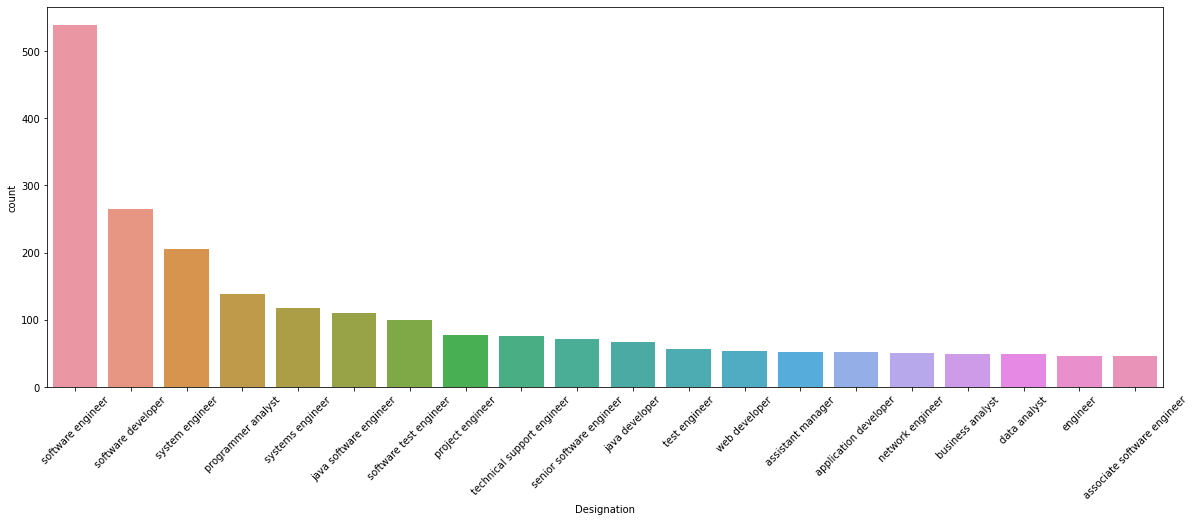

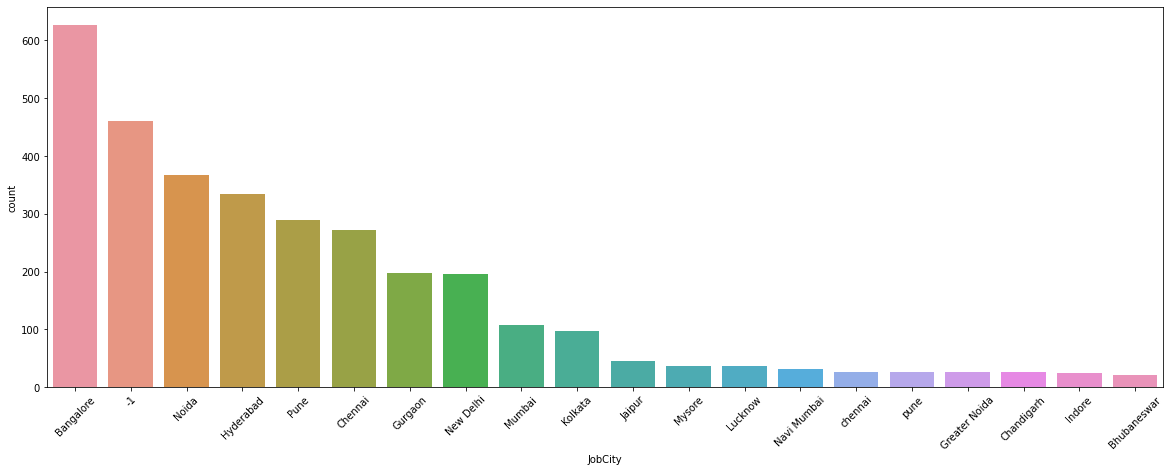

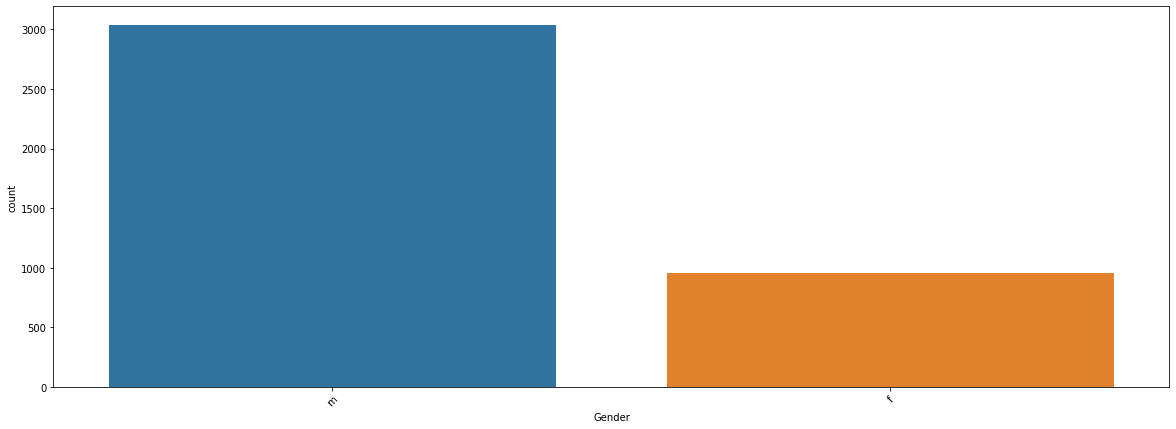

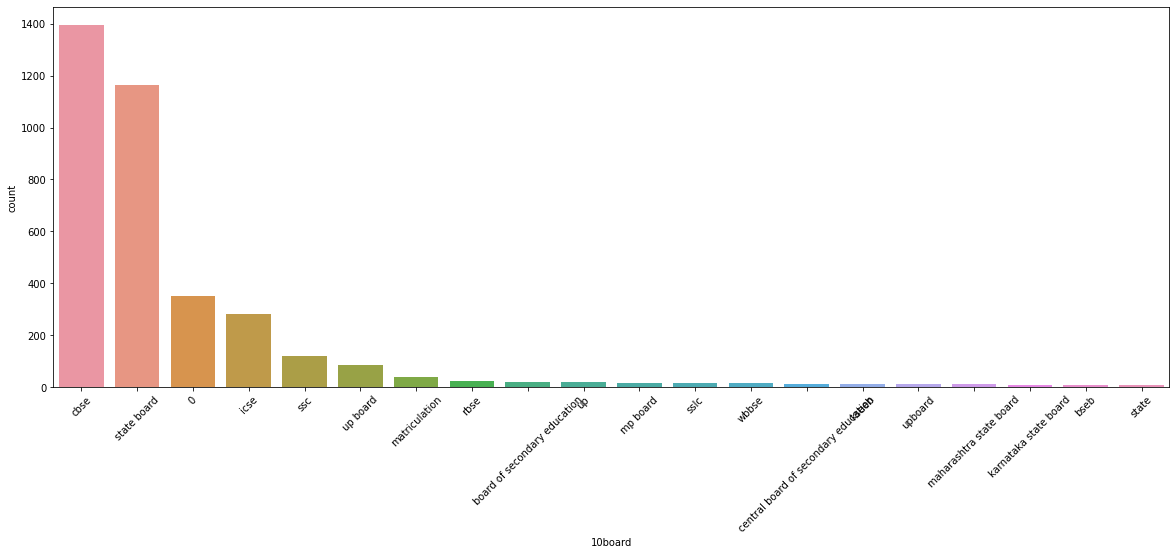

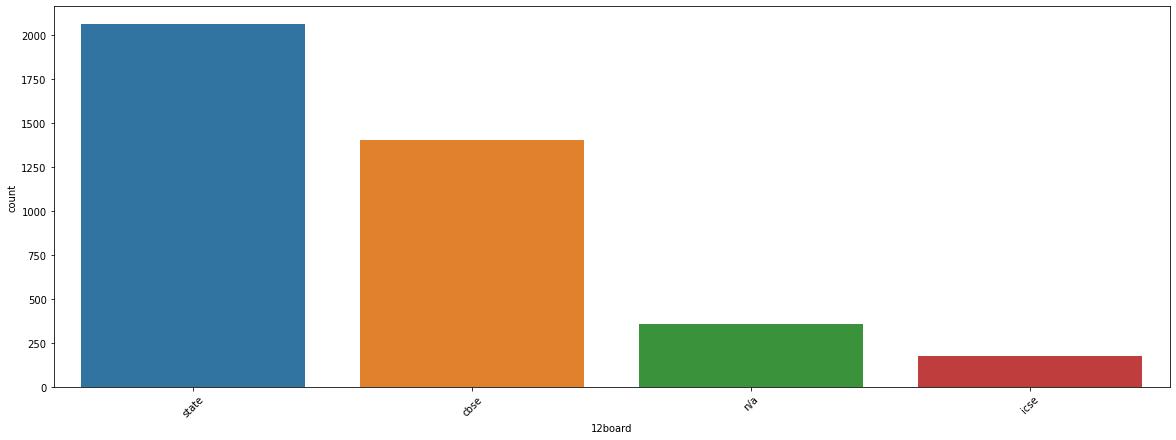

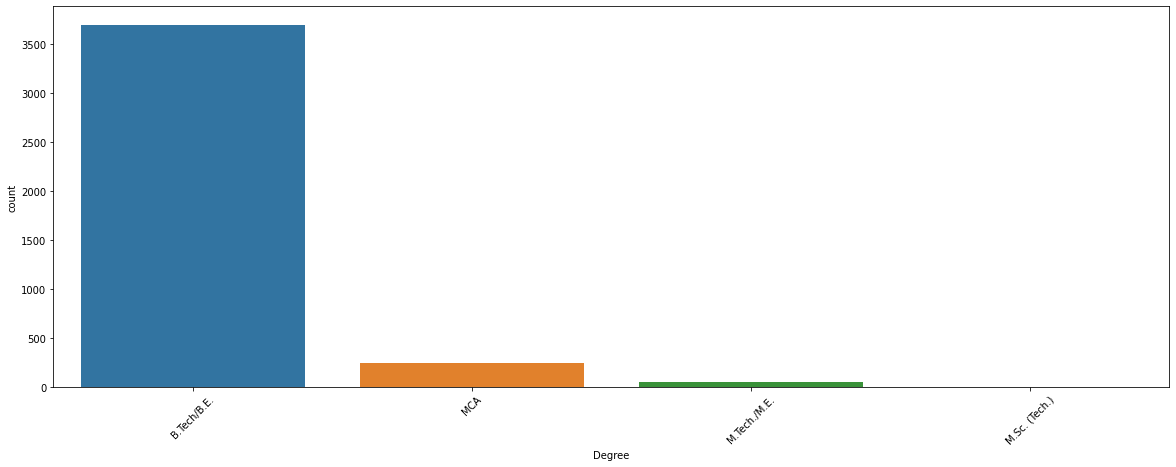

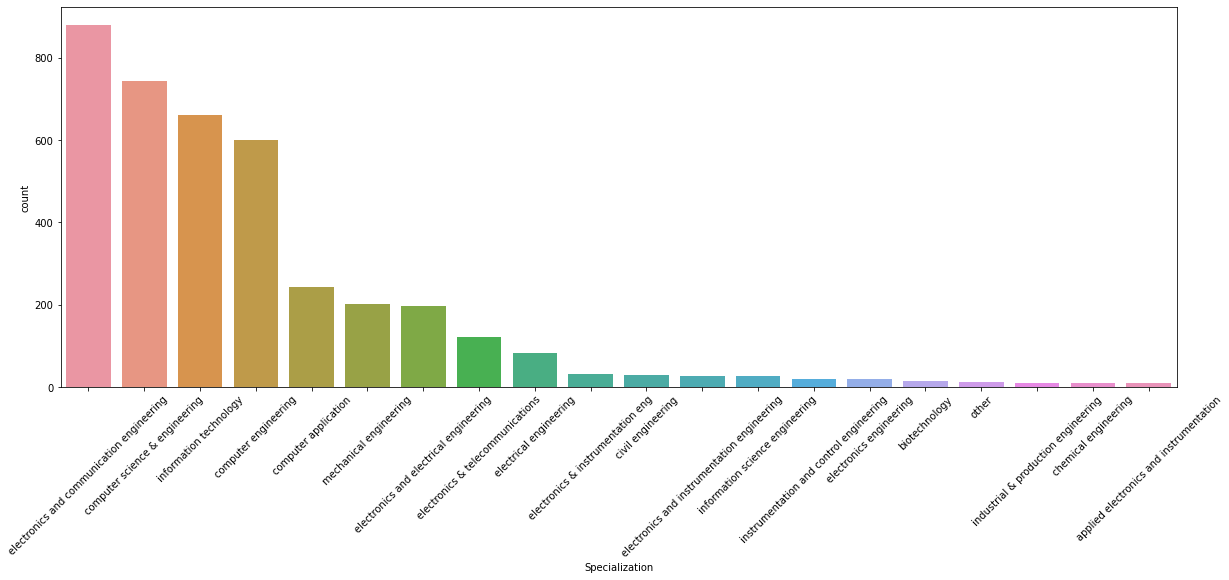

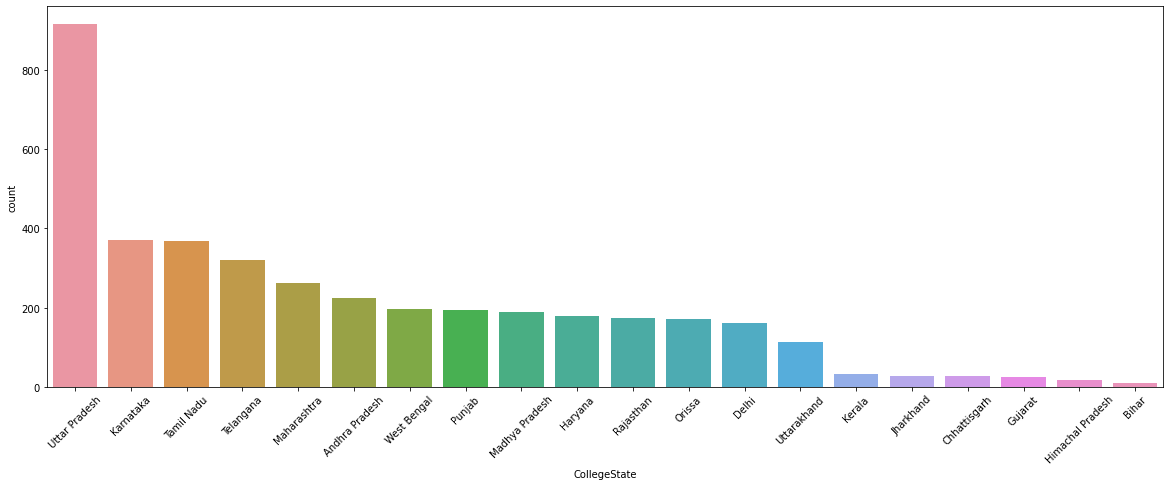

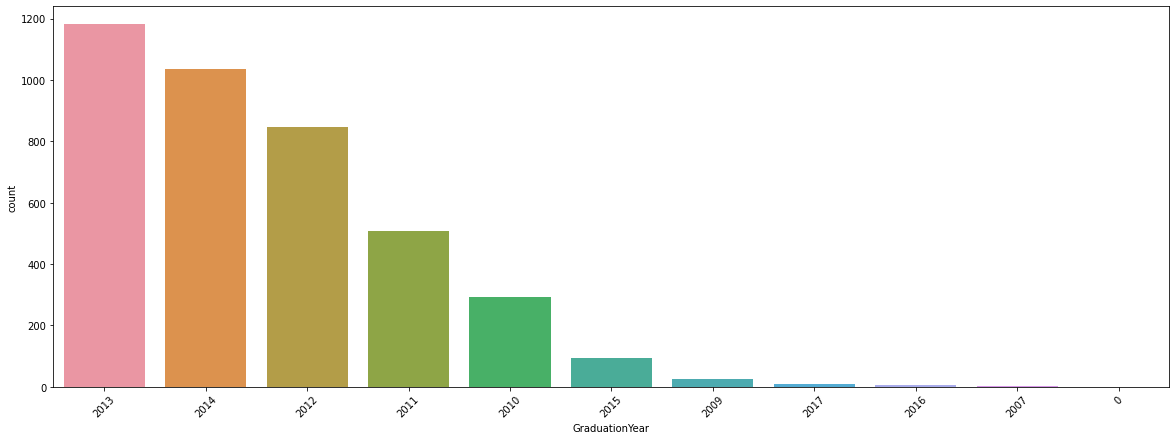

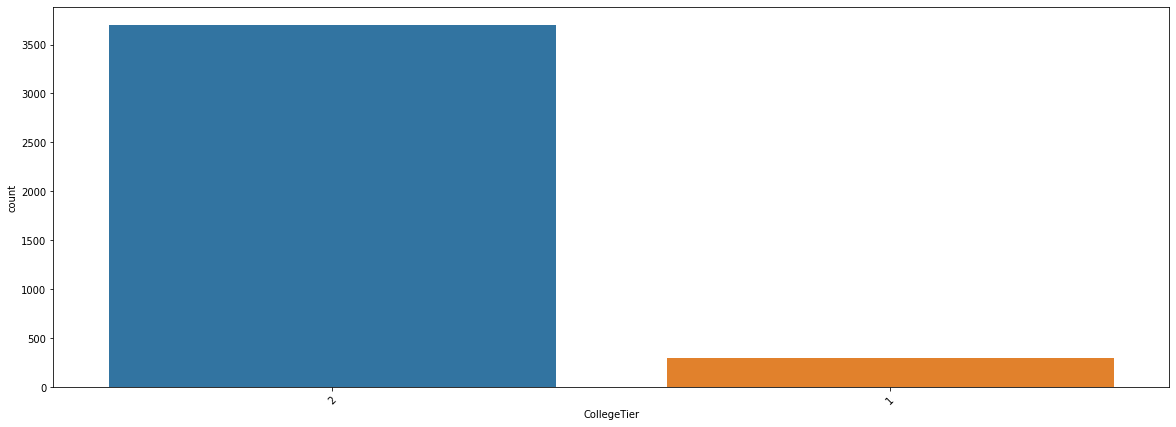

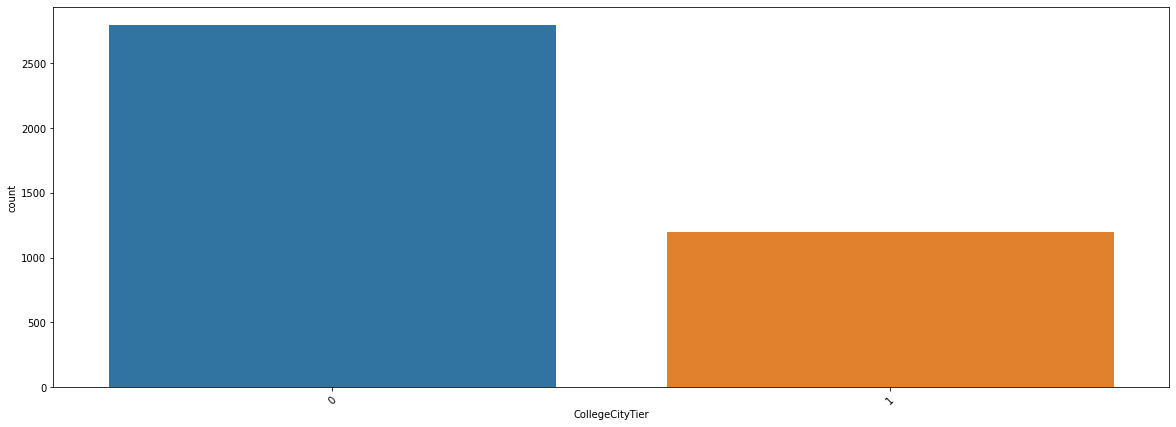

In [22]:
for i in df_cat.columns:
    plt.figure(figsize=(20,7))
    sns.countplot(df_cat[i].dropna(), order=df[i].value_counts().iloc[:20].index)
    plt.xticks(rotation=45)

### 2. Pie Chart

- Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie.

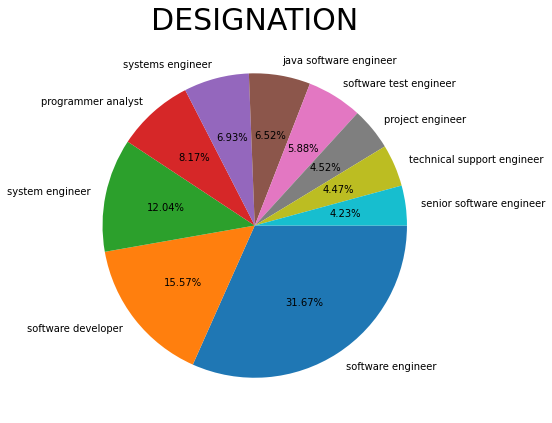

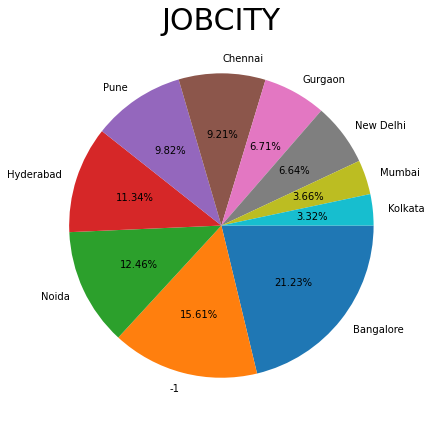

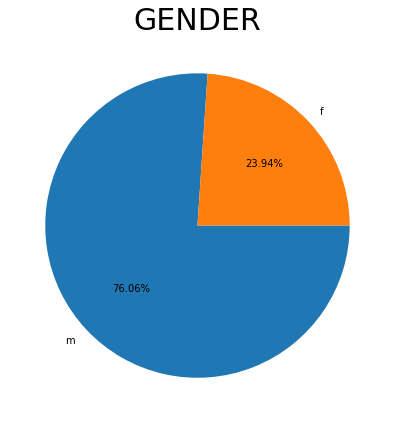

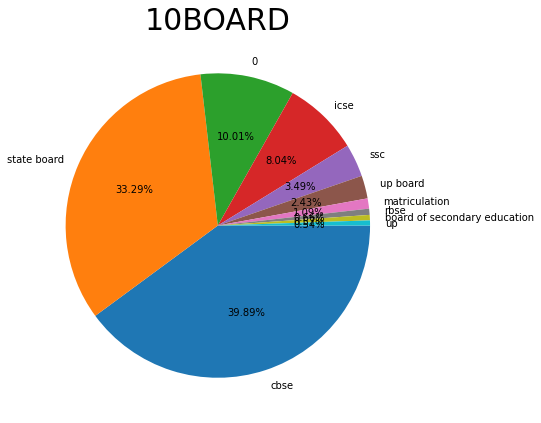

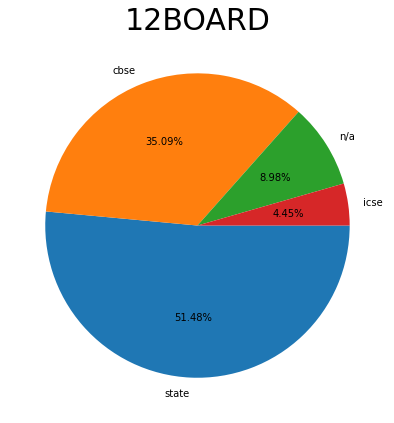

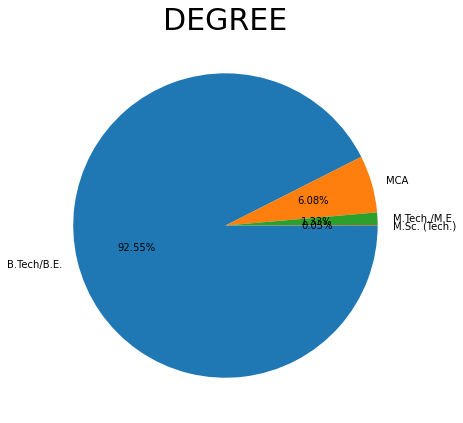

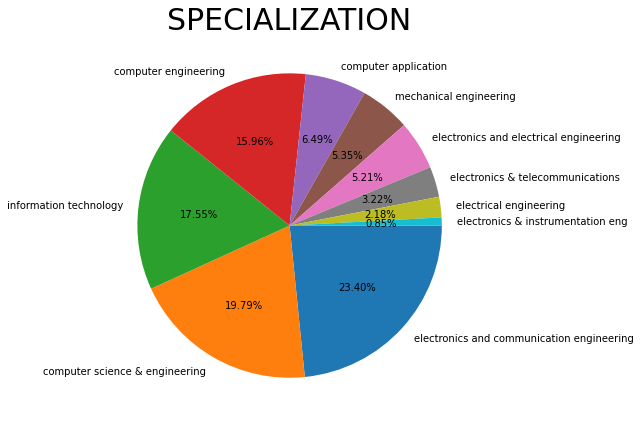

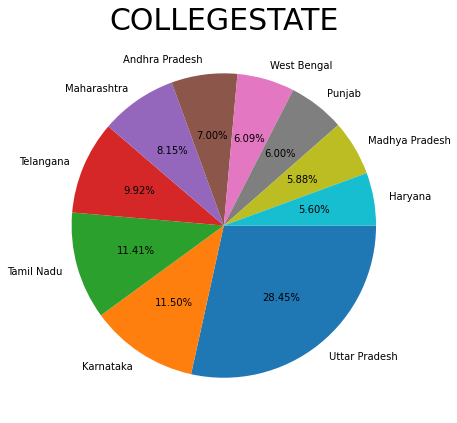

KeyError: 10

<Figure size 1440x504 with 0 Axes>

In [23]:
for i in df_cat.columns:
    plt.figure(figsize=(20,7))
    plt.pie(df_cat[i].value_counts()[:10], labels=df_cat[i].value_counts().iloc[:10].index,counterclock=False, autopct='%0.2f%%')
    plt.title(i.upper(),fontsize=30)
    plt.show()

## Univariate Analysis for Numerical Columns

 - 3. box
 - 4. boxen plots
 - 5. violin plots
 - 6. distplots
 - 7. histograms
 - 8. kde
 - 9. ecdf
 

### 3. Box Plot

- Univariate Box Plots.
- used to visualise the InterQuartile Range

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.boxplot(x=col, data=df_num);

### 4. Boxen Plots
Draws an enhanced box plot for larger datasets.

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.boxenplot(x=col, data=df_num);

### 5. Violin Plots

- A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.violinplot(x=col, data=df_num);

### 6. Distribution Plot
It gives the distribution of the data

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.distplot(df_num[col]);

### 7. Histogram Plots
plots the freguency of the continous values in intervals

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

### 8. KDE Plots
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.kdeplot(df_num[col]);

### 9. CDF Plots

An ECDF represents the proportion or count of observations falling below each unique value in a dataset. Compared to a histogram or density plot, it has the advantage that each observation is visualized directly, meaning that there are no binning or smoothing parameters that need to be adjusted. It also aids direct comparisons between multiple distributions.

pip install seaborn>=0.11 -U

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.displot(df_num[col],kind="ecdf");



## Bivariate Analysis
10. pair plot
10. barplot (cat vs num)
11. relplot
12. regplot
13. Scatter plot (num vs num)
15. Strip plot
16. joint plot


### 10. Pair Plot
Plots pairwise relationships in a dataset.

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Salary'])

### 11. Bar Plot
Shows point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

In [ ]:
df_num.columns

### 10percentage vs all categorical columns

In [ ]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i);
    sns.barplot(x=df_num["10percentage"],y=df_cat[col],order=df_cat[col].value_counts().iloc[:20].index,orient="h");
    plt.xticks(rotation=90)

### Salary vs all categorical columns

In [ ]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i);
    sns.barplot(x=df_cat[col],y=df_num["Salary"],order=df_cat[col].value_counts().iloc[:20].index,);
    plt.xticks(rotation=90)

### 12percentage vs categorical columns

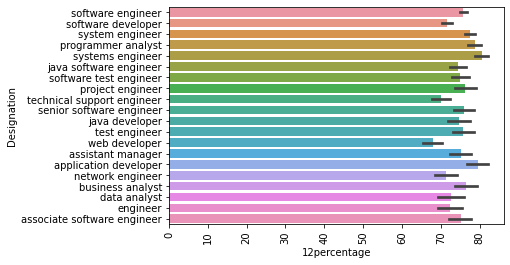

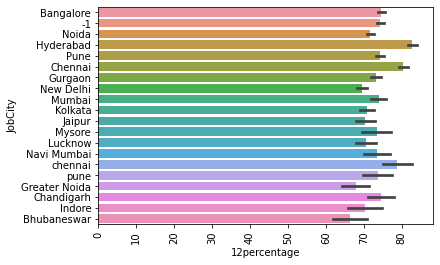

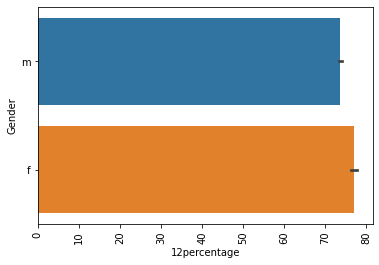

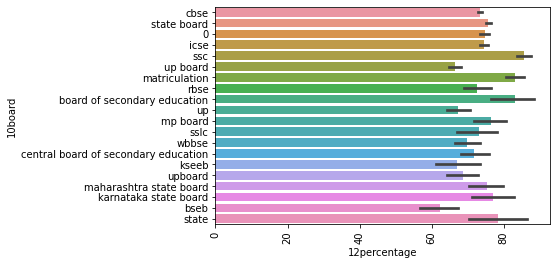

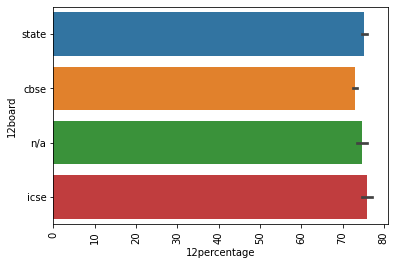

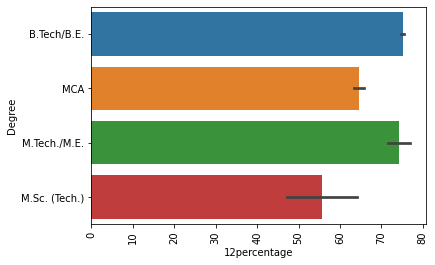

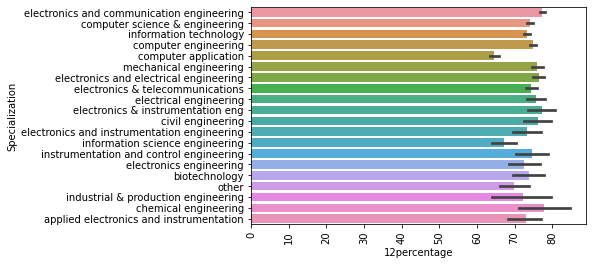

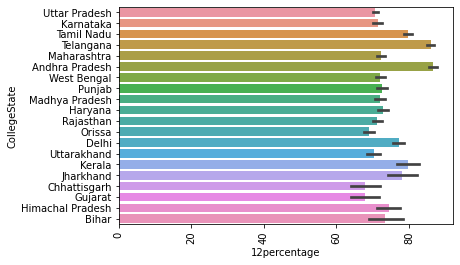

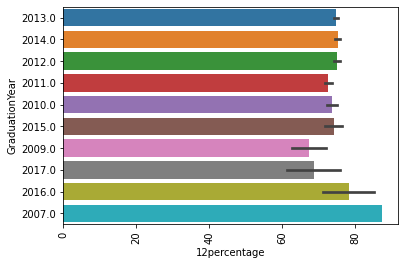

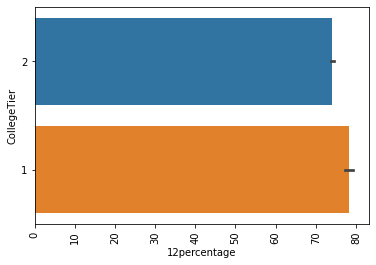

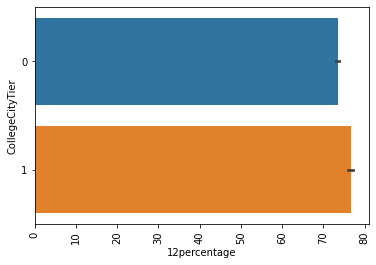

In [24]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i);
    sns.barplot(x=df_num["12percentage"],y=df_cat[col],order=df_cat[col].value_counts().iloc[:20].index,orient="h");
    plt.xticks(rotation=90)

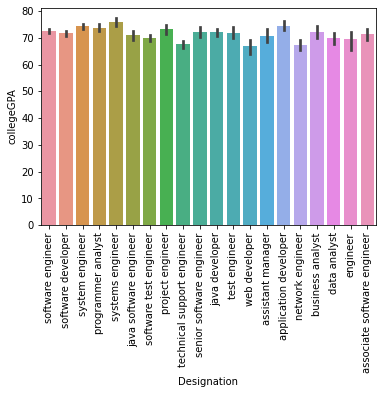

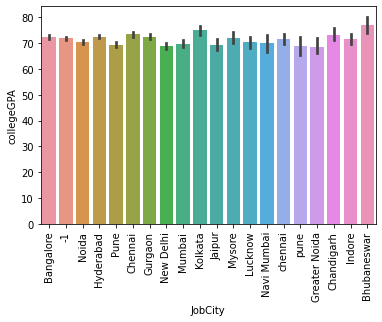

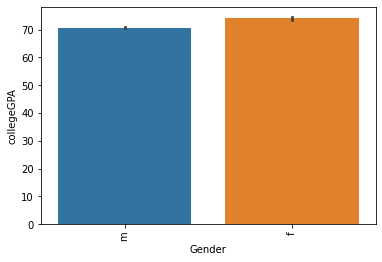

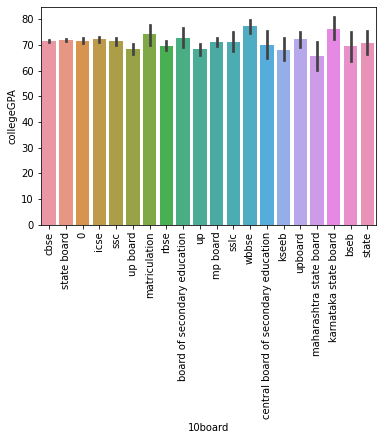

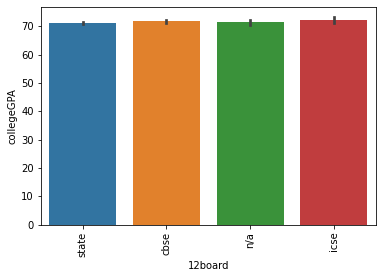

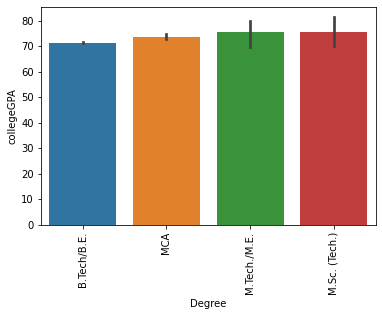

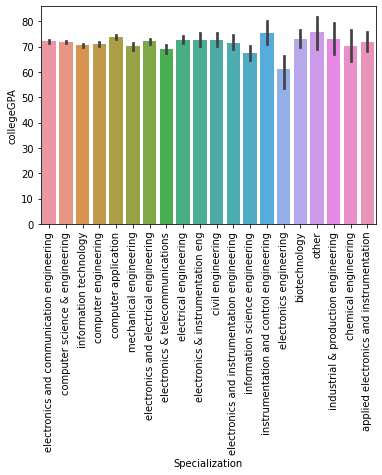

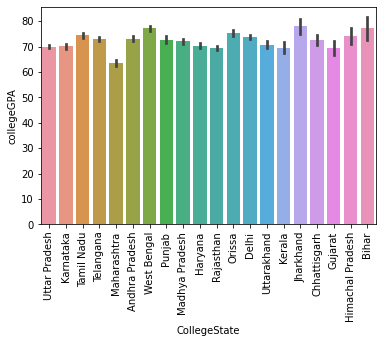

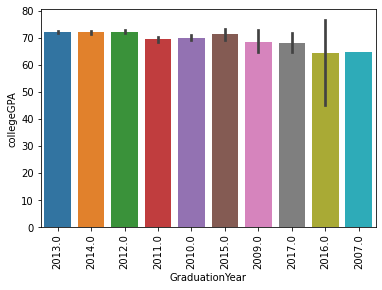

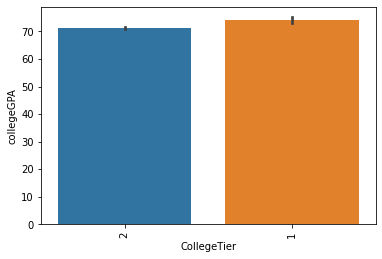

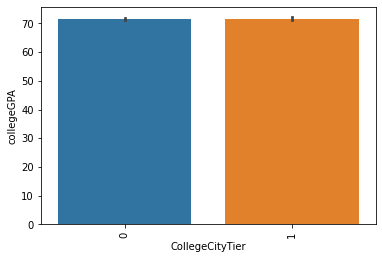

In [25]:
for i, col in enumerate(df_cat.columns):
    plt.figure(i);
    sns.barplot(x=df_cat[col],y=df_num["collegeGPA"],order=df_cat[col].value_counts().iloc[:20].index);
    plt.xticks(rotation=90)

### 12.relplot
plots the relation between columns

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

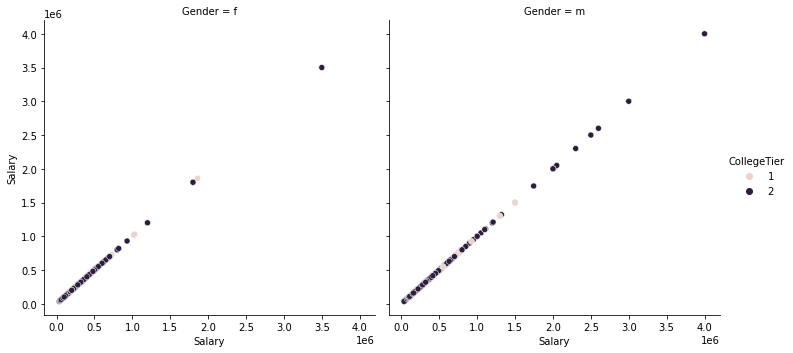

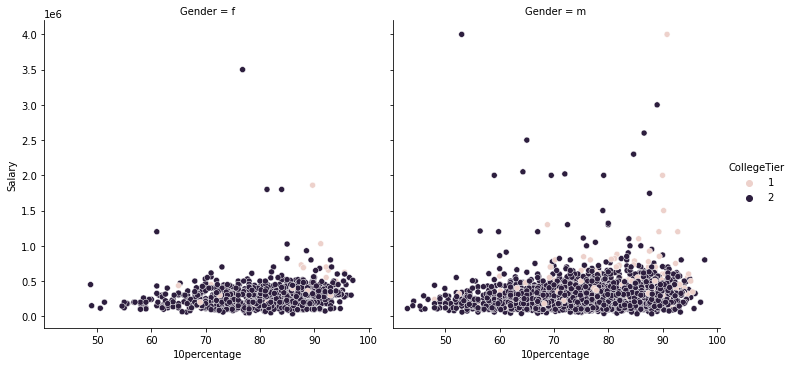

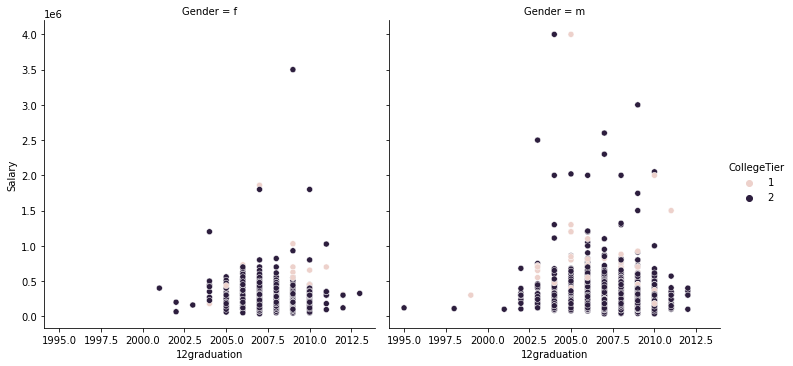

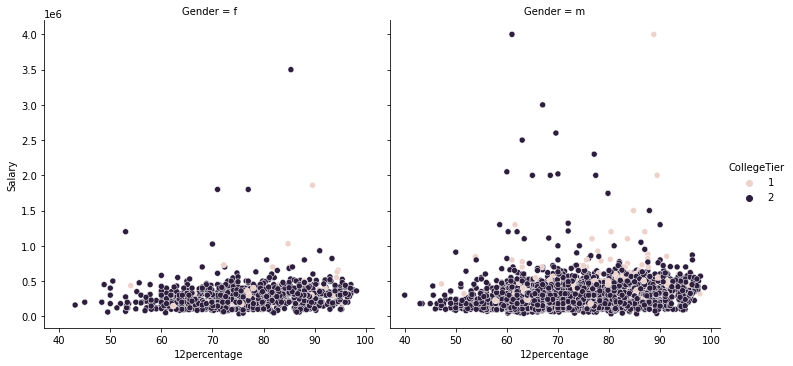

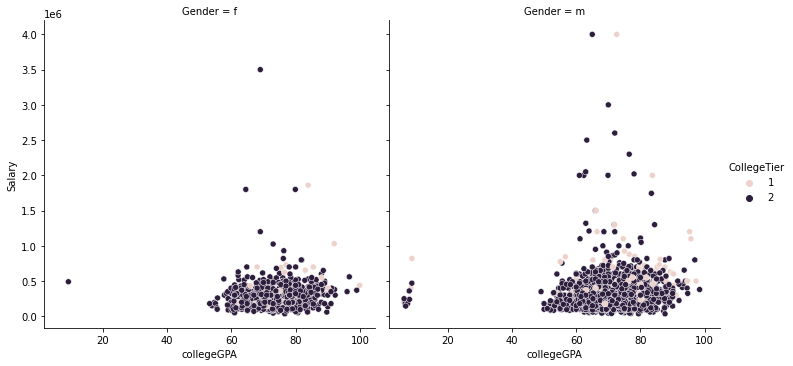

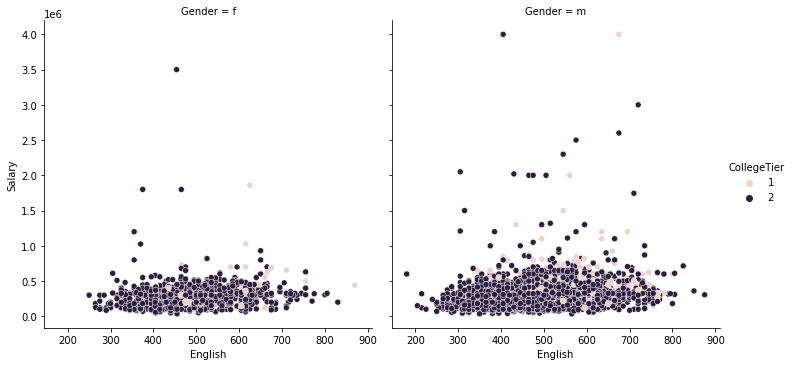

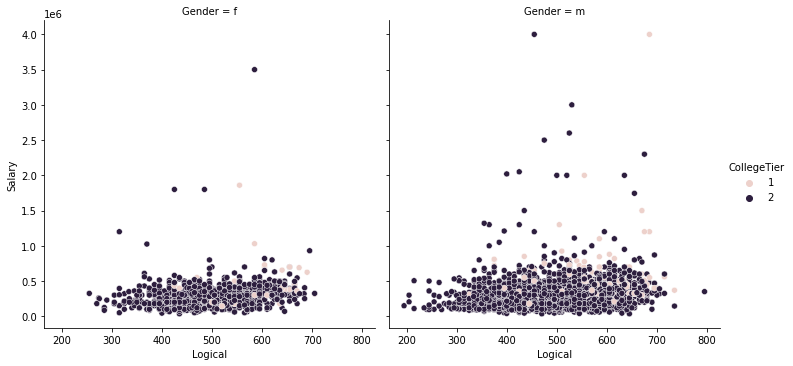

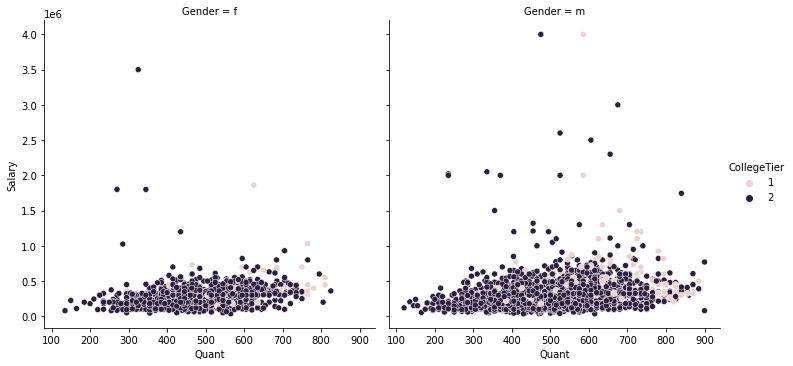

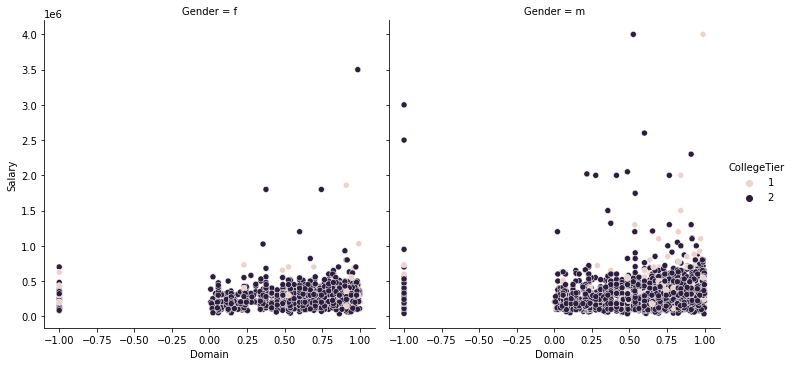

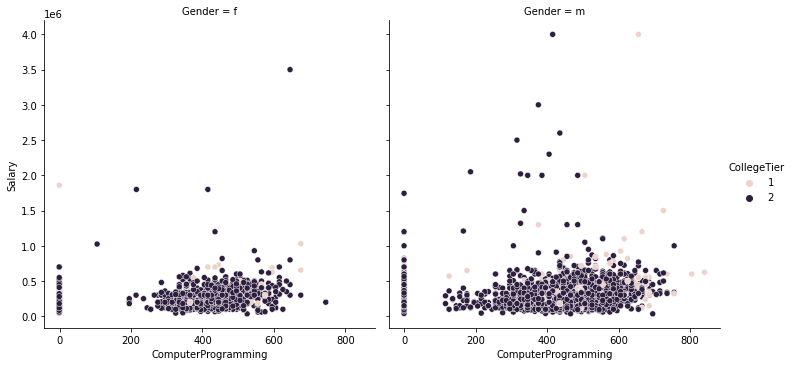

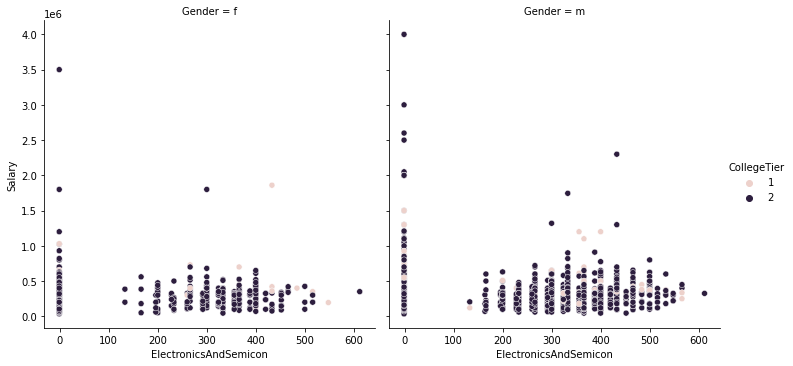

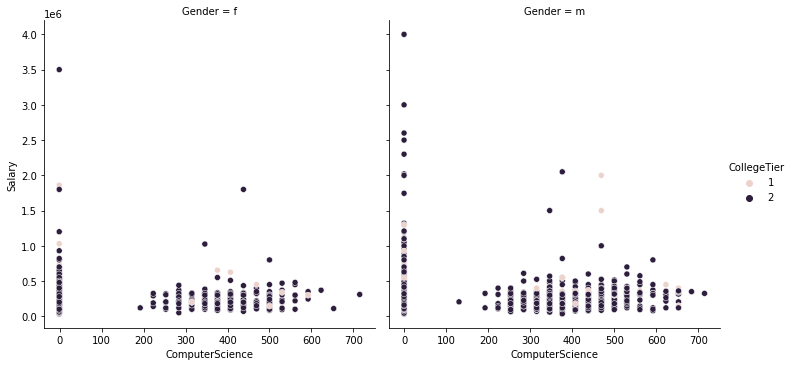

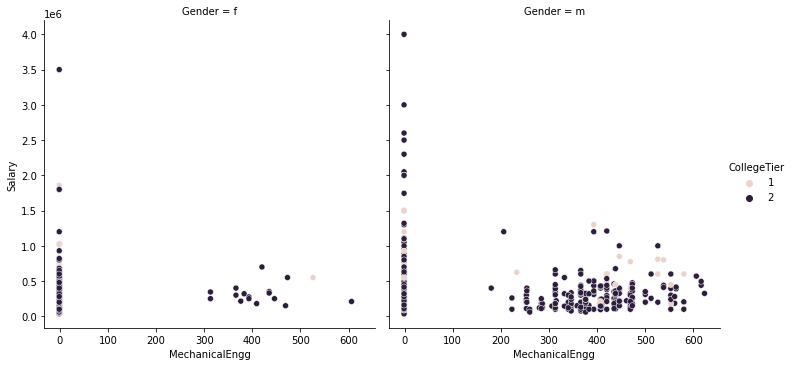

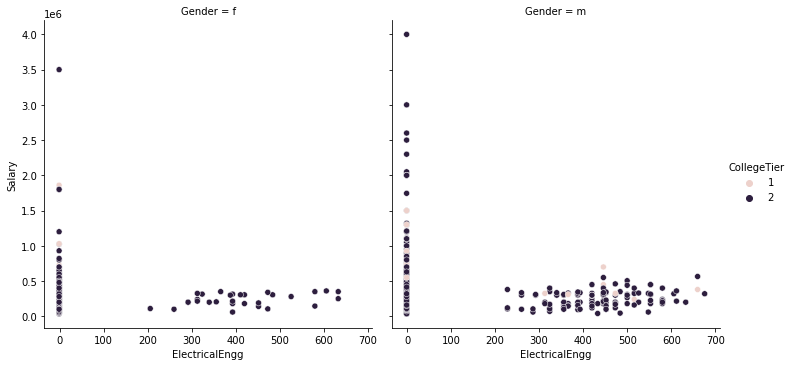

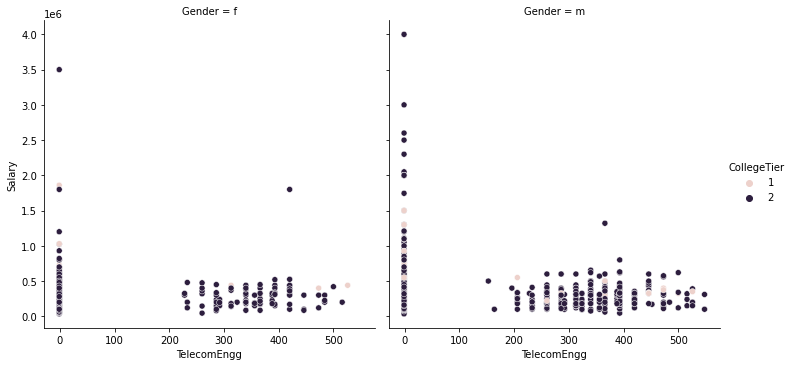

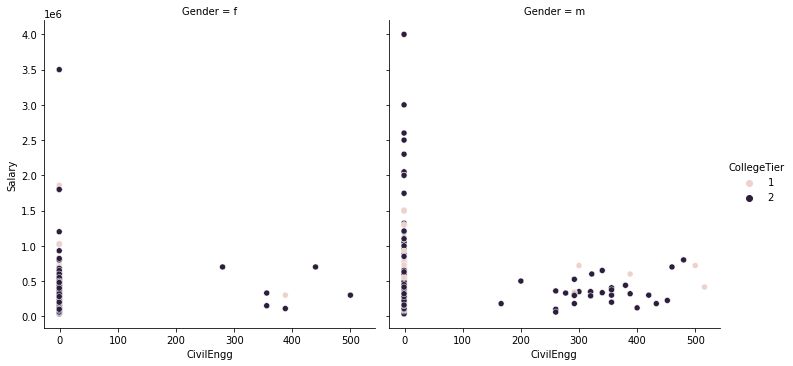

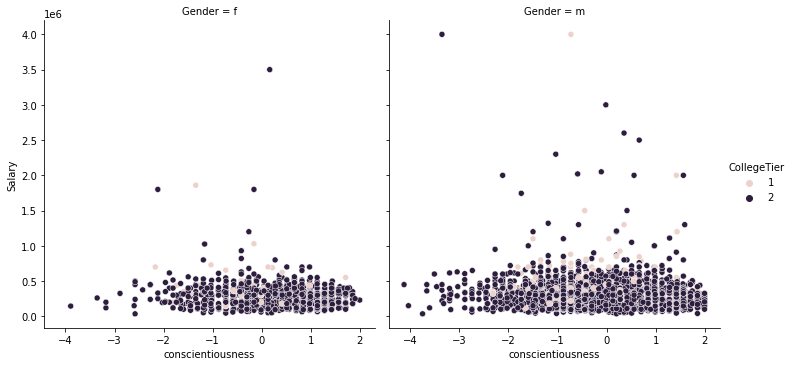

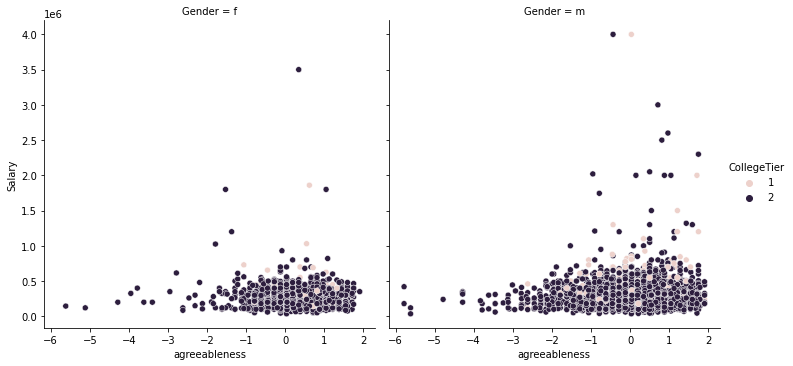

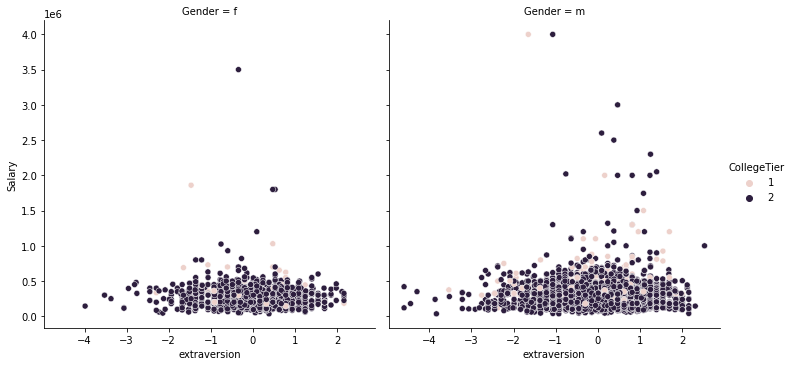

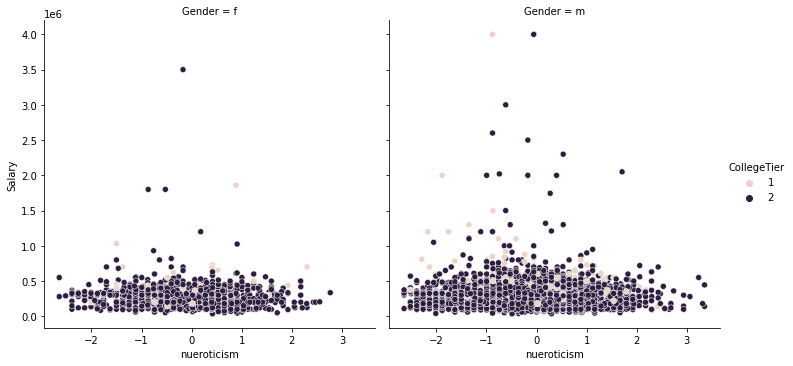

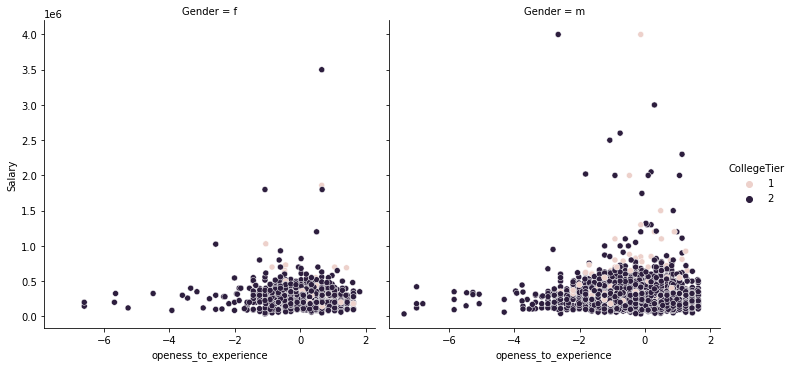

In [26]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.relplot(x=df_num[col],y=df_num["Salary"],hue=df['CollegeTier'],col=df["Gender"]);

### 13. regplot
Plots data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the regression model. See the tutorial for more information.

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


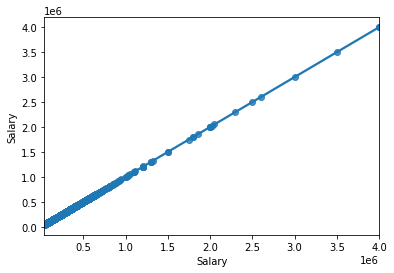

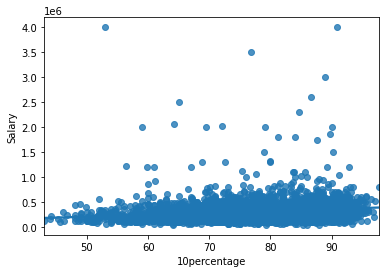

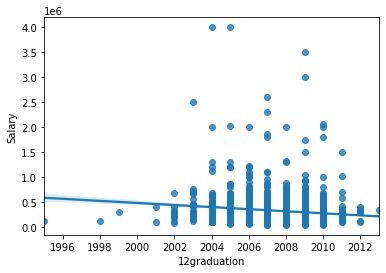

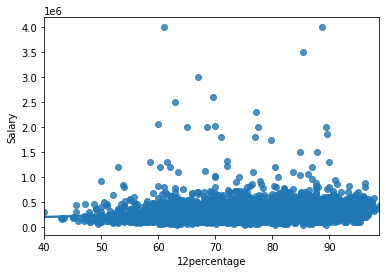

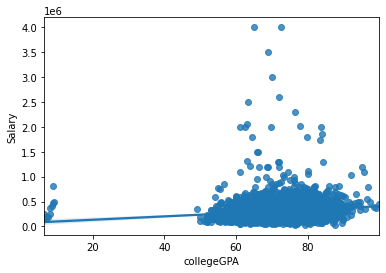

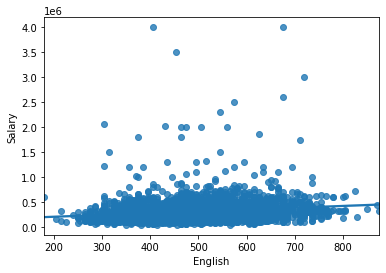

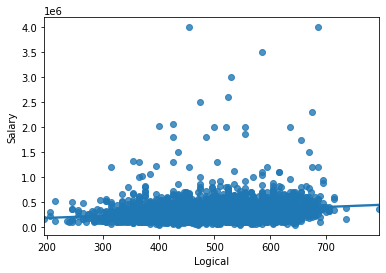

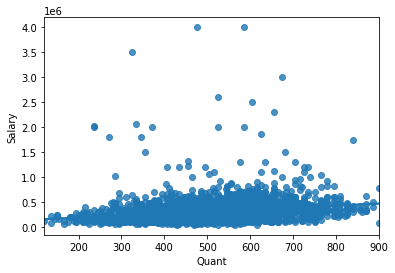

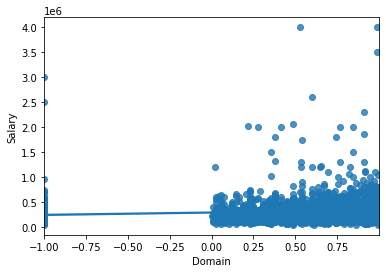

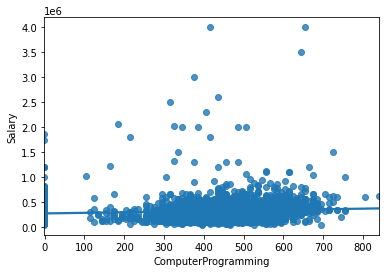

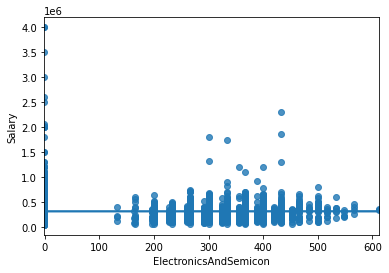

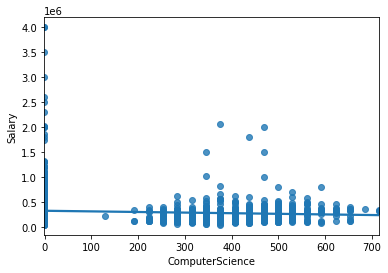

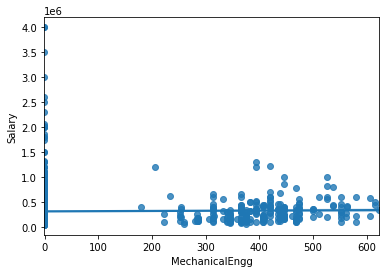

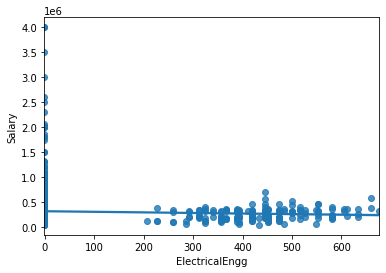

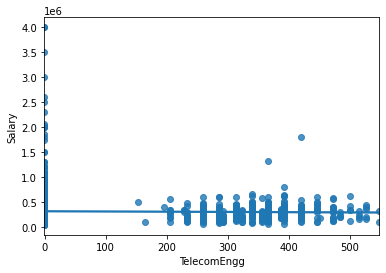

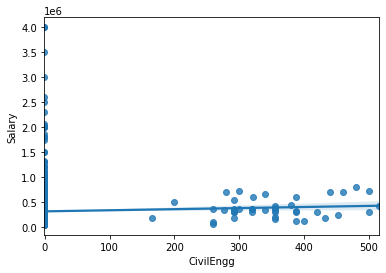

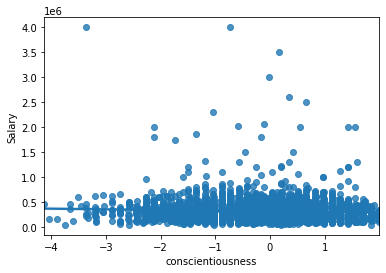

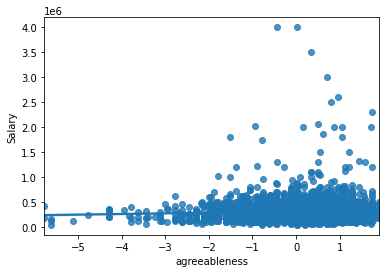

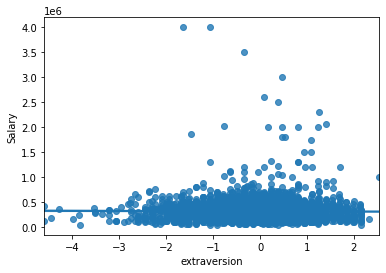

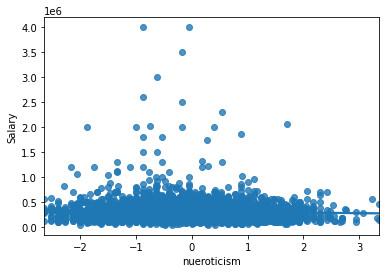

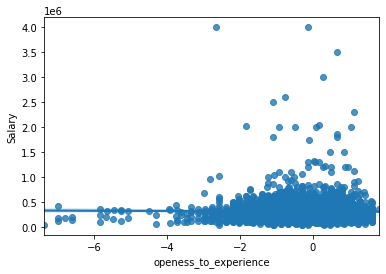

In [27]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.regplot(x=df_num[col],y=df_num["Salary"],data=df_num);

### 14. Scatterplot
scatter plot draws relationship with possibility of several semantic groupings.

C:\Users\DUBBA SAI KIRAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


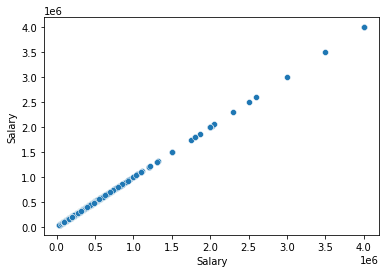

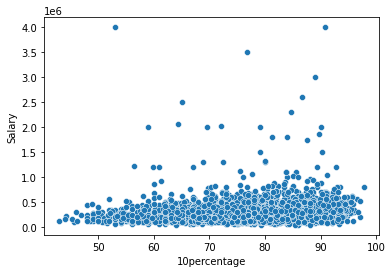

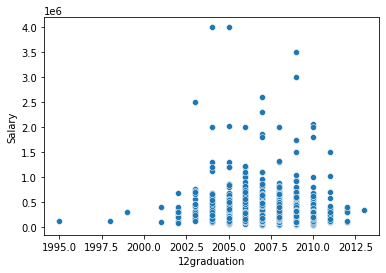

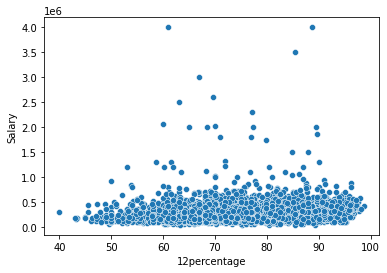

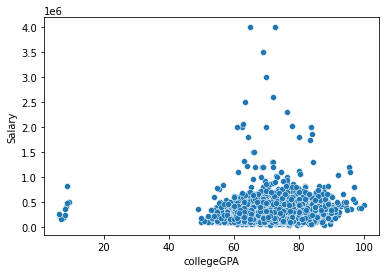

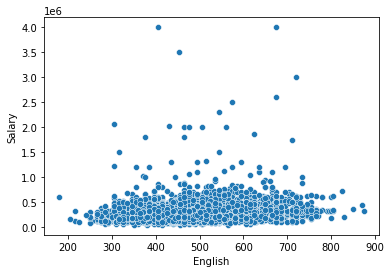

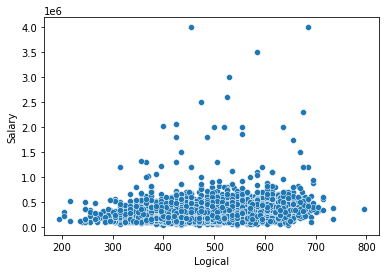

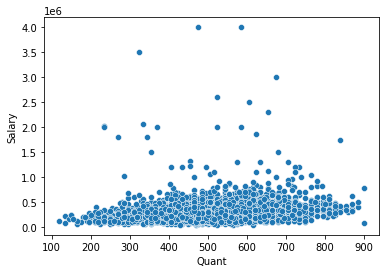

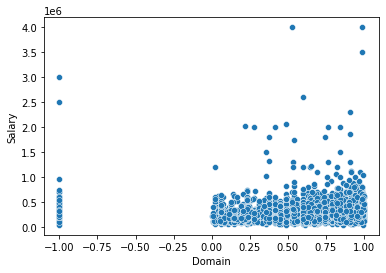

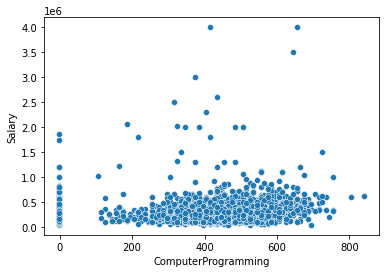

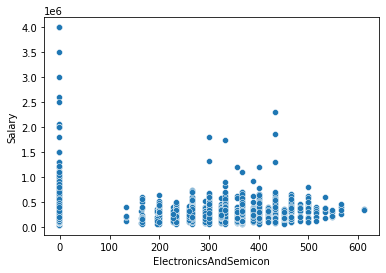

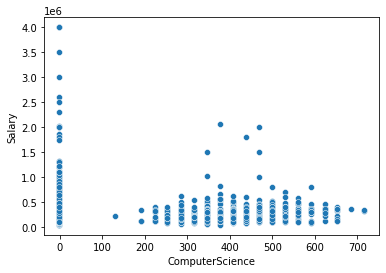

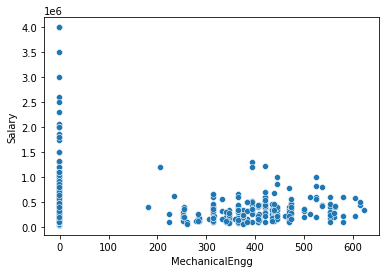

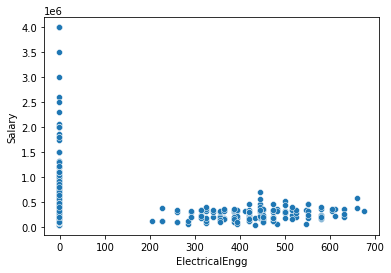

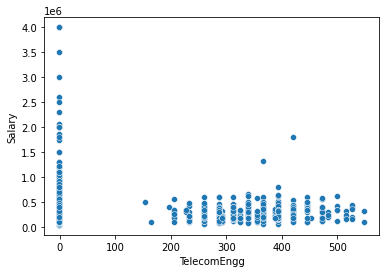

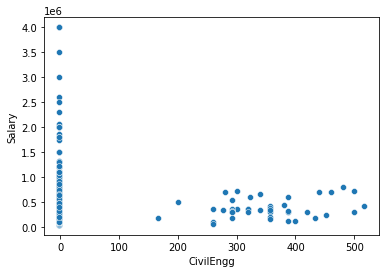

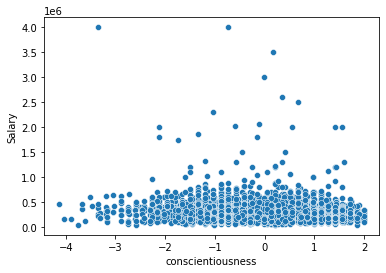

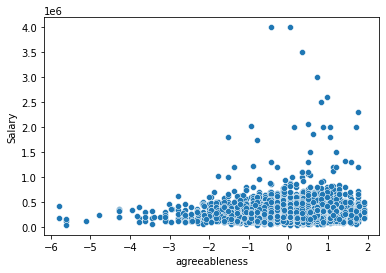

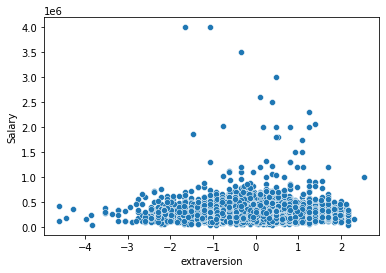

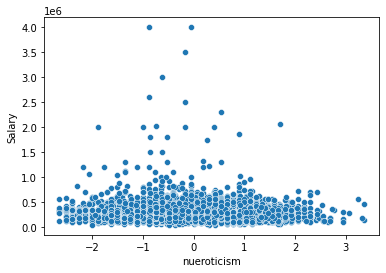

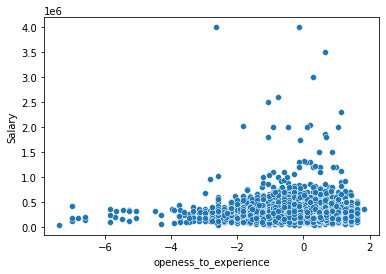

In [28]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.scatterplot(x=df_num[col],y=df_num["Salary"],data=df_num);

### 15. Stripplot

- Draw a scatterplot where one variable is categorical.

- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.stripplot(x=df["12board"],y=df_num[col],hue=df['CollegeCityTier']);

### 16. Joint plot
Draws a plot of two variables with bivariate and univariate graphs.

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.jointplot(x=df["English"],y=df_num[col],kind="scatter");

In [ ]:
df.columns

### for datatime related columns

In [ ]:
eda_dt_df.columns

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=eda_dt_df["Join_Year"], y=eda_dt_df["Salary"],hue=df["Gender"])

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=eda_dt_df["Join_Year"], y=eda_dt_df["Salary"],hue=eda_dt_df["Join_month"])

- people with higher salary have joined in earlier months of the year, and most of the people have joined after 2010